# Embedding Workflow

In [1]:
import openai
import numpy as np
import matplotlib.pyplot as plt

In [4]:
client = openai.AsyncOpenAI()

In [5]:
response = await client.responses.create(
    model='gpt-4o-mini',
    input='hi'
)

In [7]:
response.output_text

'Hello! How can I assist you today?'

In [63]:
phrases = [
    'hello', 'hi', 'good-bye', 'see ya later', 'moose', '1 + 1 = 2', '2 + 2 = 5', 'qperqoweirupqweor',
    '!@#$%^&*()_', 'def foobar(): return 7', 'specificity', 'agent engineering', 
    'Utah'
]

response = await client.embeddings.create(
    input=phrases,
    model='text-embedding-3-small'
)

In [64]:
embeds = np.array([emb.embedding for emb in response.data])

In [65]:
embeds

array([[ 0.01675162, -0.05579961,  0.00564744, ..., -0.01118486,
        -0.01595951, -0.01754373],
       [-0.00378579, -0.01917546,  0.01214499, ..., -0.02489924,
        -0.018951  ,  0.0030603 ],
       [ 0.05117528,  0.01717972, -0.00825848, ...,  0.01447671,
         0.0035477 , -0.01089002],
       ...,
       [-0.01580279,  0.01850753,  0.04626882, ...,  0.00840253,
        -0.00987846,  0.00018256],
       [ 0.00394506,  0.01310087,  0.00191606, ..., -0.03757348,
         0.008116  ,  0.01880232],
       [-0.0281531 , -0.01305159, -0.01177593, ..., -0.04217803,
        -0.01725465, -0.0135014 ]])

In [66]:
async def embed(text:str ) -> np.array:
    response = await client.embeddings.create(
        input=[text],
        model='text-embedding-3-small'
    )
    return np.array(response.data[0].embedding)

In [67]:
phrase = 'hola'
query = await embed(phrase)

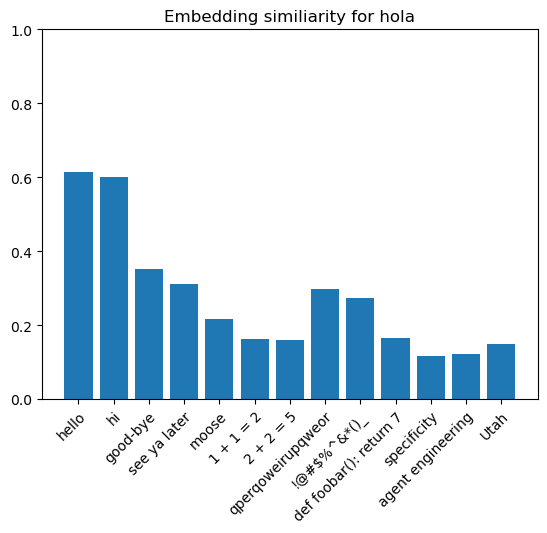

In [68]:
ax = plt.bar(x=range(len(phrases)), height=(query @ embeds.T))
plt.xticks(range(len(phrases)), phrases, rotation=45, ha='right', rotation_mode='anchor')
plt.title('Embedding similiarity for ' + phrase)
plt.ylim([0, 1]);

## Pipeline

In [77]:
async def embed(content: list[str]) -> np.array:
    response = await client.embeddings.create(
        input=content,
        model='text-embedding-3-small'
    )
    return np.array([emb.embedding for emb in response.data])

In [82]:
from pathlib import Path

In [83]:
content_dir = Path('../../../cs301R/gospel-connections/data/text/1-ne/')

In [86]:
content_verses = []
for content_file in sorted(content_dir.glob('*.txt'), key=lambda f: f.name):
    content_verses += content_file.read_text().splitlines()

In [87]:
content_verses

['I, Nephi, having been born of goodly parents, therefore I was taught somewhat in all the learning of my father; and having seen many afflictions in the course of my days, nevertheless, having been highly favored of the Lord in all my days; yea, having had a great knowledge of the goodness and the mysteries of God, therefore I make a record of my proceedings in my days.',
 'Yea, I make a record in the language of my father, which consists of the learning of the Jews and the language of the Egyptians.',
 'And I know that the record which I make is true; and I make it with mine own hand; and I make it according to my knowledge.',
 'For it came to pass in the commencement of the first year of the reign of Zedekiah, king of Judah, (my father, Lehi, having dwelt at Jerusalem in all his days); and in that same year there came many prophets, prophesying unto the people that they must repent, or the great city Jerusalem must be destroyed.',
 'Wherefore it came to pass that my father, Lehi, as

In [88]:
content_embeds = await embed(content_verses)

In [89]:
content_embeds

array([[ 2.28634607e-02, -3.47640575e-03,  3.43507119e-02, ...,
        -3.29934657e-02, -2.16666143e-02, -2.22465284e-02],
       [ 1.45212151e-02,  2.65756045e-02,  1.83231793e-02, ...,
        -2.30279528e-02, -1.67051202e-03, -3.13058086e-02],
       [ 2.32088510e-02,  1.96515601e-02,  1.23455273e-02, ...,
        -2.93507357e-03, -6.57110615e-03, -3.30284536e-02],
       ...,
       [ 2.94815581e-02, -4.79454594e-03,  2.58279685e-02, ...,
        -1.27369938e-02,  2.30877777e-03, -5.84068615e-03],
       [ 2.45570559e-02,  3.89245600e-02, -2.33384874e-02, ...,
        -8.42752561e-05, -3.07543483e-03,  7.37524079e-03],
       [ 4.97215912e-02,  2.95413043e-02,  9.46097914e-03, ...,
         1.95922814e-02, -2.07565296e-02, -1.97216421e-02]])

In [102]:
async def get_verses(phrase, threshold = 0.6):
    embedding = await embed([phrase])
    scores = content_embeds @ embedding.T
    return np.array(content_verses)[scores.flatten() > threshold]

In [117]:
hits = await get_verses('build boat', threshold=0.32)

In [118]:
for hit in hits:
    print(hit)
    print()

And it came to pass that the Lord spake unto me, saying: Thou shalt construct a ship, after the manner which I shall show thee, that I may carry thy people across these waters.

And when my brethren saw that I was about to build a ship, they began to murmur against me, saying: Our brother is a fool, for he thinketh that he can build a ship; yea, and he also thinketh that he can cross these great waters.

And thus my brethren did complain against me, and were desirous that they might not labor, for they did not believe that I could build a ship; neither would they believe that I was instructed of the Lord.

And now, if the Lord has such great power, and has wrought so many miracles among the children of men, how is it that he cannot instruct me, that I should build a ship?

And it came to pass that they did worship the Lord, and did go forth with me; and we did work timbers of curious workmanship. And the Lord did show me from time to time after what manner I should work the timbers of 